# Análisis de compañías del S&P 500

En el presente informe se toma en cuenta el indice S&P500.Este índice se basa en la capitalización bursátil de 500 grandes empresas que poseen acciones que cotizan en las bolsas NYSE o NASDAQ, y captura aproximadamente el 80% de toda la capitalización de mercado.
Se realiza un análisis sobre los distintas empresas a lo largo del tiempo para comprender mejor el mercado, y poder tomar decisiones en base a nuestras recomendaciones

### Se importan las librerías a utilizar

In [56]:
import pandas as pd
import requests as r
import yfinance as yf
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import mean_historical_return

### Se obtiene la lista de los S&P500 de Wikipedia https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [57]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
pagina= r.get(url).content
lista_datos = pd.read_html(pagina)
type(lista_datos)
datos_wiki=lista_datos[0]


In [58]:
datos_wiki.head(10)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
5,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
6,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
7,ADM,ADM,reports,Consumer Staples,Agricultural Products,"Chicago, Illinois",1981-07-29,7084,1902
8,ADBE,Adobe Inc.,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
9,ADP,ADP,reports,Information Technology,Data Processing & Outsourced Services,"Roseland, New Jersey",1981-03-31,8670,1949


In [59]:
df_simbolos=datos_wiki.iloc[:,[0,1,3,4]]

Se conservan los datos de las columnas relevantes para este informe

In [60]:
print(df_simbolos)

    Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4     ABMD               Abiomed             Health Care   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS Sub-Industry  
0              Industrial Conglomerates  
1                     Building Products  
2                 Health Care Equipment  
3                       Pharmaceuticals  
4                 Health Care Equipment  
..                         

In [61]:
type(df_simbolos['Symbol'])

pandas.core.series.Series

In [62]:
#df_simbolos['Symbol']=df_simbolos['Symbol'].replace('.','-') 
df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol


C:\Users\PCMYM\AppData\Local\Temp\ipykernel_12232\3397331766.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol
C:\Users\PCMYM\AppData\Local\Temp\ipykernel_12232\3397331766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol


In [63]:
df_simbolos.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
5,ACN,Accenture,Information Technology,IT Consulting & Other Services
6,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
7,ADM,ADM,Consumer Staples,Agricultural Products
8,ADBE,Adobe Inc.,Information Technology,Application Software
9,ADP,ADP,Information Technology,Data Processing & Outsourced Services


In [64]:
#Se obtiene la lista de simbolos que se va a analizar
simbolos= df_simbolos['Symbol'].tolist()

In [65]:

print(simbolos)

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'D

In [66]:
#Se descarga los datos de la API yahoo Finance usanado la libreria yfinance
df_data = yf.download(simbolos,start='2000-01-01',end='2020-12-31',group_by="ticker", threads=3)
df_data



[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- CEG: Data doesn't exist for startDate = 946702800, endDate = 1609390800
- OGN: Data doesn't exist for startDate = 946702800, endDate = 1609390800


VTRS                                                          \
                 Open       High        Low      Close  Adj Close      Volume   
Date                                                                            
2000-01-03  11.111111  11.166667  10.722222  10.833333   9.819605   1853325.0   
2000-01-04  10.694444  10.722222  10.111111  10.333333   9.366391   1139175.0   
2000-01-05  10.333333  10.555556  10.250000  10.500000   9.517461   1191150.0   
2000-01-06  10.527778  10.666667  10.472222  10.555556   9.567817    821700.0   
2000-01-07  10.555556  11.194444  10.444444  11.111111  10.071387   1631700.0   
...               ...        ...        ...        ...        ...         ...   
2020-12-28  17.860001  17.879999  17.620001  17.740000  17.018080   4933900.0   
2020-12-29  17.660000  17.799999  17.520000  17.750000  17.027676   4811800.0   
2020-12-30  17.610001  18.180000  17.580000  18.129999  17.392208  10332300.0   
2020-12-31        NaN        NaN        NaN        NaN        NaN         NaN   
2001-09-12        NaN        NaN        NaN        NaN        NaN         NaN   

                   FDS                                      ...        AEE  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2000-01-03   26.625000   26.625000   26.187500   26.333332  ...  31.562500   
2000-01-04   26.208332   26.208332   24.333332   24.333332  ...  32.187500   
2000-01-05   24.250000   24.854168   24.041668   24.333332  ...  32.312500   
2000-01-06   24.312500   24.312500   23.083332   23.625000  ...  33.250000   
2000-01-07   23.458332   23.666668   23.333332   23.500000  ...  33.437500   
...                ...         ...         ...         ...  ...        ...   
2020-12-28  330.000000  332.269989  327.790009  330.019989  ...  76.459999   
2020-12-29  332.250000  332.880005  326.739990  327.329987  ...  76.550003   
2020-12-30  329.179993  332.220001  327.100006  328.380005  ...  76.510002   
2020-12-31         NaN         NaN         NaN         NaN  ...        NaN   
2001-09-12         NaN         NaN         NaN         NaN  ...        NaN   

                                                   MAS                        \
                Close  Adj Close     Volume       Open       High        Low   
Date                                                                           
2000-01-03  32.312500  11.259480   700800.0  22.188049  22.297892  21.748682   
2000-01-04  32.312500  11.259480   455600.0  21.419155  22.023287  20.430580   
2000-01-05  33.562500  11.695050  1293200.0  21.474077  21.638840  20.430580   
2000-01-06  33.437500  11.651491   320400.0  20.815025  20.979790  20.155975   
2000-01-07  33.937500  11.825720   312700.0  21.089630  22.133127  20.869947   
...               ...        ...        ...        ...        ...        ...   
2020-12-28  76.750000  73.778061   991500.0  57.349998  57.349998  55.320000   
2020-12-29  76.570000  73.605011  1027600.0  55.660000  55.849998  54.169998   
2020-12-30  76.970001  73.989532  1526600.0  54.900002  55.410000  54.480000   
2020-12-31        NaN        NaN        NaN        NaN        NaN        NaN   
2001-09-12        NaN        NaN        NaN        NaN        NaN        NaN   

                                             
                Close  Adj Close     Volume  
Date                                         
2000-01-03  22.133127  13.368146  1877814.0  
2000-01-04  21.583920  13.036431  1856988.0  
2000-01-05  20.595343  12.500405  1165084.0  
2000-01-06  20.815025  12.633740  1755365.0  
2000-01-07  21.583920  13.100433  1616188.0  
...               ...        ...        ...  
2020-12-28  55.389999  54.081646  1524800.0  
2020-12-29  54.650002  53.359123  1296300.0  
2020-12-30  54.770000  53.476292   791500.0  
2020-12-31        NaN        NaN        NaN  
2001-09-12        NaN        NaN        NaN  

[5285 rows x 3018 colum

Se construye un dataframe por cada activo en el cual se calcularan los indicadores necesarios.
Luego cada dataframe por activo sera almacenado en una lista par posteriomente concatenarlos en un solo DataFrame Global

In [67]:

df_data.columns
tickers=df_data.columns.get_level_values(0)
tickers=tickers.unique()
list_tickers=[]
for i in tickers:
    df_ticker=df_data.loc[:,i]
    df_ticker.reset_index(inplace=True)
    df_ticker=df_ticker.sort_values('Date')
    df_ticker=df_ticker.assign(Ticker=i)
    #Se calcula el Retorno GAP y se agrega esa columna
    df_ticker= df_ticker.assign(GAP_Return=lambda x: np.log(x['Open']/x['Close'].shift(1)).fillna(0))
    #Se calcula el Retorno Intradiario y se agrega esa columna
    df_ticker= df_ticker.assign(Intradaily_Return=lambda x: np.log(x['Close']/x['Open']).fillna(0))
    #Se calcula la variacion y se agrega esa columna
    df_ticker=df_ticker.assign(Variation= lambda x: x['Adj Close'].pct_change())
    #Se calcula la volatibilidad y se agrega esa columna
    df_ticker= df_ticker.assign(Volatility= lambda x: x['Variation'].rolling(250).std()*100*(250)**0.5 )        
    list_tickers.append(df_ticker)

df_global=pd.concat(list_tickers)

df_global=df_global.assign(WeekDay=lambda x:x['Date'].dt.strftime('%A'))    #para conocer el dia de la semana
df_global=df_global.assign(Year_Month=lambda x:x['Date'].dt.strftime('%Y-%m'))      #para conocer el año y mes correspondiente


In [68]:
df_global

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GAP_Return,Intradaily_Return,Variation,Volatility,WeekDay,Year_Month
0,2000-01-03,11.111111,11.166667,10.722222,10.833333,9.819605,1853325.0,VTRS,0.000000,-0.025318,NaN,NaN,Monday,2000-01
1,2000-01-04,10.694444,10.722222,10.111111,10.333333,9.366391,1139175.0,VTRS,-0.012903,-0.034349,-0.046154,NaN,Tuesday,2000-01
2,2000-01-05,10.333333,10.555556,10.250000,10.500000,9.517461,1191150.0,VTRS,0.000000,0.016000,0.016129,NaN,Wednesday,2000-01
3,2000-01-06,10.527778,10.666667,10.472222,10.555556,9.567817,821700.0,VTRS,0.002642,0.002635,0.005291,NaN,Thursday,2000-01
4,2000-01-07,10.555556,11.194444,10.444444,11.111111,10.071387,1631700.0,VTRS,0.000000,0.051293,0.052632,NaN,Friday,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,2020-12-24,56.610001,56.830002,56.230000,56.790001,55.448578,674600.0,MAS,0.006735,0.003175,0.009959,41.880230,Thursday,2020-12
5280,2020-12-28,57.349998,57.349998,55.320000,55.389999,54.081646,1524800.0,MAS,0.009813,-0.034774,-0.024652,41.957980,Monday,2020-12
5281,2020-12-29,55.660000,55.849998,54.169998,54.650002,53.359123,1296300.0,MAS,0.004863,-0.018313,-0.013360,41.979536,Tuesday,2020-12
5282,2020-12-30,54.900002,55.410000,54.480000,54.770000,53.476292,791500.0,MAS,0.004564,-0.002371,0.002196,41.970932,Wednesday,2020-12


In [69]:
#Se verifica que todos los REtornos GAPS inicien en cero
verificar_inicio_cero=df_global.loc[df_global.Date=='2000-01-03','GAP_Return'].sum()
verificar_inicio_cero

0.0

# Análisis del mejor día para invertir usando el rendimiento gap.
<div class="alert alert-block alert-info">
<b>
Gap: Diferencia relativa entre precios Close del día anterior y el actual (escala logarítmica).
Simula una compra al cierre de un día y venta al cierre del día siguiente.
Las distribuciones para los rendimientos son similares, por lo que se infiere que el día para la inversión no es una variable relevante en el rendimiento gap.


Se elabora un dataframe con las columnas  WeekDay y GAP_Return

In [70]:
df_retorno_gaps= pd.DataFrame()

df_retorno_gaps=df_global[['WeekDay','GAP_Return']]
df_retorno_gaps

,WeekDay,GAP_Return
0,Monday,0.000000
1,Tuesday,-0.012903
2,Wednesday,0.000000
3,Thursday,0.002642
4,Friday,0.000000
...,...,...
5279,Thursday,0.006735
5280,Monday,0.009813
5281,Tuesday,0.004863
5282,Wednesday,0.004564


In [71]:
df_Retorno_Gaps = df_global[['WeekDay','Ticker','GAP_Return']].groupby([df_global['WeekDay'],df_global['Ticker']]).sum()
df_Retorno_Gaps.reset_index(inplace=True)
df_Retorno_Gaps

,WeekDay,Ticker,GAP_Return
0,Friday,A,-0.360434
1,Friday,AAL,0.505713
2,Friday,AAP,0.391958
3,Friday,AAPL,-0.547687
4,Friday,ABBV,0.287896
...,...,...,...
2510,Wednesday,YUM,-0.425206
2511,Wednesday,ZBH,-0.142592
2512,Wednesday,ZBRA,-0.727324
2513,Wednesday,ZION,0.001458


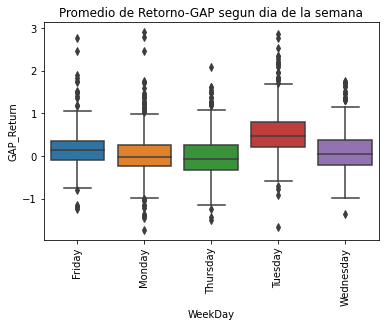

In [72]:
sns.boxplot(data =df_Retorno_Gaps,x='WeekDay',y='GAP_Return')
plt.xticks(rotation=90)
plt.title('Promedio de Retorno-GAP segun dia de la semana')  
plt.show()

In [73]:
dia_inversion_gap=df_retorno_gaps.groupby(['WeekDay']).mean()
#dia_inversion.reset_index(inplace=True)
dia_inversion_gap

,GAP_Return
WeekDay,
Friday,0.000155
Monday,0.000028
Thursday,-0.000007
Tuesday,0.000502
Wednesday,0.000097


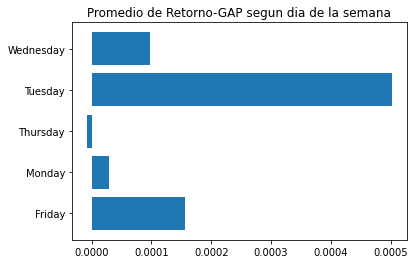

In [74]:
plt.figure()                                #Figura 
x_values1 = dia_inversion_gap.index.tolist()
y_values1 = dia_inversion_gap.GAP_Return.tolist()

plt.barh(x_values1, y_values1)               #El gráfico
plt.title('Promedio de Retorno-GAP segun dia de la semana')              #El título
plt.show()

<Figure size 720x720 with 0 Axes>

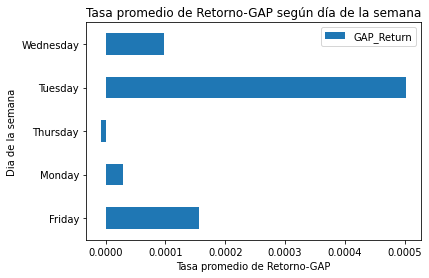

In [75]:
plt.figure(figsize=(10,10))
dia_inversion_gap.plot.barh()
plt.title('Tasa promedio de Retorno-GAP según día de la semana')
plt.xlabel('Tasa promedio de Retorno-GAP')
plt.ylabel('Dia de la semana')
plt.show()

# Análisis del mejor día para invertir usando el rendimiento intradiario.
<b>Intra: Considera la diferencia entre el precio de cierre y el precio de apertura (escala logaritmica).

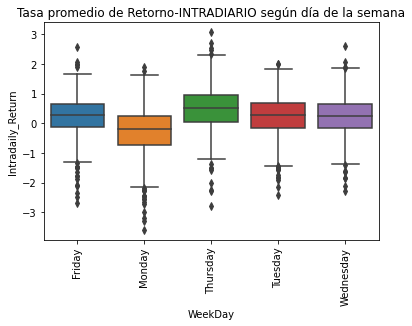

In [76]:
df_Retorno_Intra = df_global[['WeekDay','Ticker','Intradaily_Return']].groupby([df_global['WeekDay'],df_global['Ticker']]).sum()
df_Retorno_Intra.reset_index(inplace=True)
sns.boxplot(data =df_Retorno_Intra,x='WeekDay',y='Intradaily_Return')
plt.xticks(rotation=90)
plt.title('Tasa promedio de Retorno-INTRADIARIO según día de la semana')
plt.show()

In [77]:
df_retorno_intra= pd.DataFrame()
df_retorno_intra=df_global[['WeekDay','Intradaily_Return']]
df_retorno_intra

,WeekDay,Intradaily_Return
0,Monday,-0.025318
1,Tuesday,-0.034349
2,Wednesday,0.016000
3,Thursday,0.002635
4,Friday,0.051293
...,...,...
5279,Thursday,0.003175
5280,Monday,-0.034774
5281,Tuesday,-0.018313
5282,Wednesday,-0.002371


In [78]:
dia_inversion_intra=df_retorno_intra.groupby(['WeekDay']).mean()
dia_inversion_intra

,Intradaily_Return
WeekDay,
Friday,0.000215
Monday,-0.000297
Thursday,0.000456
Tuesday,0.000232
Wednesday,0.000206


<Figure size 720x720 with 0 Axes>

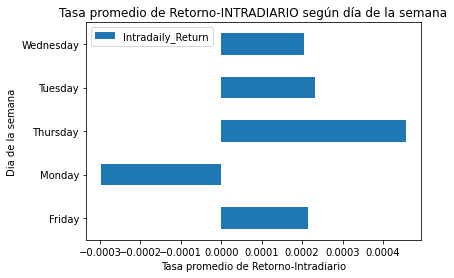

In [79]:
plt.figure(figsize=(10,10))
dia_inversion_intra.plot.barh()
plt.title('Tasa promedio de Retorno-INTRADIARIO según día de la semana')
plt.xlabel('Tasa promedio de Retorno-Intradiario')
plt.ylabel('Dia de la semana')
plt.show()

In [80]:
df_simbolos=df_simbolos.rename({'Symbol': 'Ticker'},axis=1)
df_simbolos


,Ticker,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
501,ZION,Zions Bancorporation,Financials,Regional Banks


In [81]:

df_global_ind= df_global.merge(df_simbolos, on='Ticker', how='left')
df_global_ind

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GAP_Return,Intradaily_Return,Variation,Volatility,WeekDay,Year_Month,Security,GICS Sector,GICS Sub-Industry
0,2000-01-03,11.111111,11.166667,10.722222,10.833333,9.819605,1853325.0,VTRS,0.000000,-0.025318,NaN,NaN,Monday,2000-01,Viatris,Health Care,Pharmaceuticals
1,2000-01-04,10.694444,10.722222,10.111111,10.333333,9.366391,1139175.0,VTRS,-0.012903,-0.034349,-0.046154,NaN,Tuesday,2000-01,Viatris,Health Care,Pharmaceuticals
2,2000-01-05,10.333333,10.555556,10.250000,10.500000,9.517461,1191150.0,VTRS,0.000000,0.016000,0.016129,NaN,Wednesday,2000-01,Viatris,Health Care,Pharmaceuticals
3,2000-01-06,10.527778,10.666667,10.472222,10.555556,9.567817,821700.0,VTRS,0.002642,0.002635,0.005291,NaN,Thursday,2000-01,Viatris,Health Care,Pharmaceuticals
4,2000-01-07,10.555556,11.194444,10.444444,11.111111,10.071387,1631700.0,VTRS,0.000000,0.051293,0.052632,NaN,Friday,2000-01,Viatris,Health Care,Pharmaceuticals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658350,2020-12-24,56.610001,56.830002,56.230000,56.790001,55.448578,674600.0,MAS,0.006735,0.003175,0.009959,41.880230,Thursday,2020-12,Masco,Industrials,Building Products
2658351,2020-12-28,57.349998,57.349998,55.320000,55.389999,54.081646,1524800.0,MAS,0.009813,-0.034774,-0.024652,41.957980,Monday,2020-12,Masco,Industrials,Building Products
2658352,2020-12-29,55.660000,55.849998,54.169998,54.650002,53.359123,1296300.0,MAS,0.004863,-0.018313,-0.013360,41.979536,Tuesday,2020-12,Masco,Industrials,Building Products
2658353,2020-12-30,54.900002,55.410000,54.480000,54.770000,53.476292,791500.0,MAS,0.004564,-0.002371,0.002196,41.970932,Wednesday,2020-12,Masco,Industrials,Building Products


In [82]:
df_emp_r_gaps= pd.DataFrame()

df_emp_r_gaps=df_global_ind[['GICS Sector','GAP_Return']]
df_emp_r_gaps

,GICS Sector,GAP_Return
0,Health Care,0.000000
1,Health Care,-0.012903
2,Health Care,0.000000
3,Health Care,0.002642
4,Health Care,0.000000
...,...,...
2658350,Industrials,0.006735
2658351,Industrials,0.009813
2658352,Industrials,0.004863
2658353,Industrials,0.004564


In [83]:
df_emp_r_gaps =df_emp_r_gaps.groupby(['GICS Sector']).mean()
df_emp_r_gaps = df_emp_r_gaps.sort_values('GAP_Return',ascending=True)
df_emp_r_gaps

,GAP_Return
GICS Sector,
Consumer Staples,-0.000083
Utilities,0.000011
Real Estate,0.000054
Industrials,0.000118
Financials,0.000120
Health Care,0.000156
Information Technology,0.000169
Materials,0.000224
Communication Services,0.000226


<Figure size 720x720 with 0 Axes>

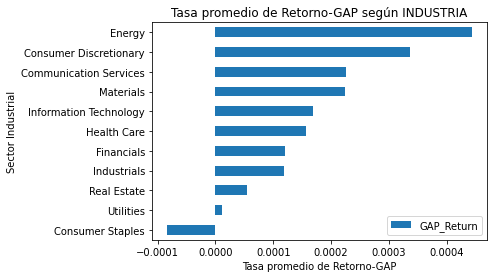

In [84]:
plt.figure(figsize=(10,10))
df_emp_r_gaps.plot.barh()
plt.title('Tasa promedio de Retorno-GAP según INDUSTRIA')
plt.xlabel('Tasa promedio de Retorno-GAP')
plt.ylabel('Sector Industrial')
plt.show()

In [85]:
df_emp_r_intra= pd.DataFrame()

df_emp_r_intra=df_global_ind[['GICS Sector','Intradaily_Return']]
df_emp_r_intra

,GICS Sector,Intradaily_Return
0,Health Care,-0.025318
1,Health Care,-0.034349
2,Health Care,0.016000
3,Health Care,0.002635
4,Health Care,0.051293
...,...,...
2658350,Industrials,0.003175
2658351,Industrials,-0.034774
2658352,Industrials,-0.018313
2658353,Industrials,-0.002371


In [86]:
df_emp_r_intra =df_emp_r_intra.groupby(['GICS Sector']).mean()
df_emp_r_intra = df_emp_r_intra.sort_values('Intradaily_Return',ascending=True)
df_emp_r_intra

,Intradaily_Return
GICS Sector,
Energy,-0.000297
Communication Services,0.000032
Materials,0.000050
Consumer Discretionary,0.000101
Financials,0.000120
Information Technology,0.000196
Utilities,0.000200
Real Estate,0.000206
Industrials,0.000242


<Figure size 720x720 with 0 Axes>

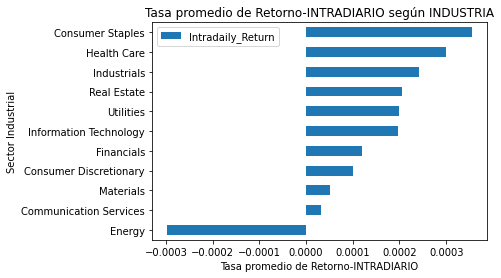

In [87]:
plt.figure(figsize=(10,10))
df_emp_r_intra.plot.barh()
plt.title('Tasa promedio de Retorno-INTRADIARIO según INDUSTRIA')
plt.xlabel('Tasa promedio de Retorno-INTRADIARIO')
plt.ylabel('Sector Industrial')
plt.show()

In [88]:
df_volatibilidades=pd.DataFrame
df_volatibilidades= df_global[['Year_Month','Volatility']]
df_volatibilidades = df_volatibilidades.sort_values('Volatility',ascending=False)
df_volatibilidades

,Year_Month,Volatility
2432,2009-09,214.222152
2431,2009-09,213.994079
2430,2009-09,213.990570
2435,2009-09,213.760648
2434,2009-09,213.593331
...,...,...
245,2000-12,NaN
246,2000-12,NaN
247,2000-12,NaN
248,2000-12,NaN


In [89]:
df_volatibilidades_por_periodo=df_volatibilidades.groupby(['Year_Month']).mean()
df_volatibilidades_por_periodo = df_volatibilidades_por_periodo.sort_values('Volatility',ascending=False)
df_volatibilidades_por_periodo

,Volatility
Year_Month,
2009-06,70.404259
2009-07,69.984871
2009-05,69.963380
2009-08,69.494806
2009-04,68.581947
...,...
2000-07,NaN
2000-08,NaN
2000-09,NaN


In [90]:
df_volatilidades_altas_periodos=df_volatibilidades_por_periodo.head(15)

In [91]:
df_volatilidades_altas_periodos

,Volatility
Year_Month,
2009-06,70.404259
2009-07,69.984871
2009-05,69.963380
2009-08,69.494806
2009-04,68.581947
2009-09,68.386643
2009-03,66.428754
2009-02,64.056833
2009-10,62.767798


<Figure size 720x720 with 0 Axes>

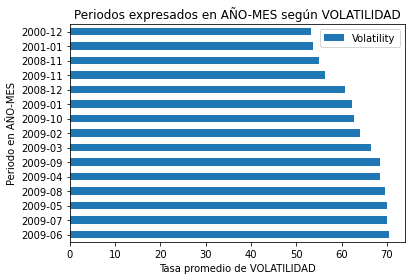

In [92]:
plt.figure(figsize=(10,10))
df_volatilidades_altas_periodos.plot.barh()
plt.title('Periodos expresados en AÑO-MES según VOLATILIDAD')
plt.xlabel('Tasa promedio de VOLATILIDAD')
plt.ylabel('Periodo en AÑO-MES')
plt.show()

In [93]:
df_data.columns
tickers=df_data.columns.get_level_values(0)
tickers=tickers.unique()

In [94]:
tickers

Index(['VTRS', 'FDS', 'MTCH', 'EBAY', 'FITB', 'EQR', 'CTXS', 'AME', 'HSY',
       'LKQ',
       ...
       'MOH', 'CDW', 'DOV', 'PGR', 'DHI', 'FIS', 'TEL', 'RF', 'AEE', 'MAS'],
      dtype='object', length=503)

In [95]:
df_TYL=df_data.loc[:,'TYL']
df_TYL.reset_index(inplace=True)

df_TYL.rename(columns={'Adj Close':'TYL'},inplace=True)
df_TYL.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)
df_TYL.set_index(['Date'],inplace=True)

#df_TYL=df_TYL['Adj Close']

df_TYL

C:\Users\PCMYM\AppData\Local\Temp\ipykernel_12232\2417216141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TYL.rename(columns={'Adj Close':'TYL'},inplace=True)
C:\Users\PCMYM\AppData\Local\Temp\ipykernel_12232\2417216141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TYL.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)


,TYL
Date,
2000-01-03,5.875000
2000-01-04,6.000000
2000-01-05,6.187500
2000-01-06,6.187500
2000-01-07,5.937500
...,...
2020-12-28,431.929993
2020-12-29,429.369995
2020-12-30,428.929993


# Comprender el precio de cierre ajustado
Los valores de las acciones se expresan en términos del precio de cierre y el precio de cierre ajustado. El precio de cierre es el precio sin procesar, que es solo el valor en efectivo del último precio negociado antes del cierre del mercado. El precio de cierre ajustado tiene en cuenta cualquier cosa que pueda afectar el precio de las acciones después del cierre del mercado.

In [96]:
list_tickers=[]
df_empresas=pd.DataFrame
for i in tickers:
    df_AdjClose_tickers=df_data.loc[:,i]
    df_AdjClose_tickers.reset_index(inplace=True)
    df_AdjClose_tickers.rename(columns={'Adj Close':i},inplace=True)
    df_AdjClose_tickers.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)
    df_AdjClose_tickers.set_index(['Date'],inplace=True)
    
    list_tickers.append(df_AdjClose_tickers)
df_empresas=list_tickers[0]
df_empresas
    





C:\Users\PCMYM\AppData\Local\Temp\ipykernel_12232\2500842419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjClose_tickers.rename(columns={'Adj Close':i},inplace=True)
C:\Users\PCMYM\AppData\Local\Temp\ipykernel_12232\2500842419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjClose_tickers.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)
C:\Users\PCMYM\AppData\Local\Temp\ipykernel_12232\2500842419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,VTRS
Date,
2000-01-03,9.819605
2000-01-04,9.366391
2000-01-05,9.517461
2000-01-06,9.567817
2000-01-07,10.071387
...,...
2020-12-28,17.018080
2020-12-29,17.027676
2020-12-30,17.392208


In [97]:
df_global_empresa2=df_empresas

In [98]:
i=1
while i<503:
    df_global_empresa2= df_global_empresa2.merge(list_tickers[i], how='left', left_index=True, right_index=True)
    i=i+1

In [99]:
df_global_empresa2

,VTRS,FDS,MTCH,EBAY,FITB,EQR,CTXS,AME,HSY,LKQ,...,MOH,CDW,DOV,PGR,DHI,FIS,TEL,RF,AEE,MAS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,9.819605,21.214342,6.643327,7.075812,25.382296,6.924260,48.906075,2.414692,13.896406,NaN,...,NaN,NaN,19.168125,3.321393,2.718049,NaN,NaN,9.358179,11.259480,13.368146
2000-01-04,9.366391,19.603125,6.108804,6.412063,24.315235,6.872969,46.496567,2.406749,13.372012,NaN,...,NaN,NaN,18.813168,3.200988,2.615481,NaN,NaN,9.084404,11.259480,13.036431
2000-01-05,9.517461,19.603125,5.879725,6.840996,23.951986,7.016581,43.824612,2.430578,13.428194,NaN,...,NaN,NaN,18.895077,3.277342,2.653945,NaN,NaN,9.034624,11.695050,12.500405
2000-01-06,9.567817,19.032480,6.124076,6.756462,24.792009,7.088394,40.079132,2.414692,13.784039,NaN,...,NaN,NaN,18.976986,3.265597,2.512914,NaN,NaN,9.059515,11.651491,12.633740
2000-01-07,10.071387,18.931791,6.093533,6.750199,24.633089,7.221749,42.607933,2.446465,13.821486,NaN,...,NaN,NaN,19.495783,3.321393,2.602659,NaN,NaN,9.159073,11.825720,13.100433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,17.018080,325.610931,150.080002,49.258801,26.104261,56.174297,131.156631,118.616798,147.478790,35.724693,...,206.520004,129.033524,121.811462,91.730194,69.383888,137.259995,117.335754,15.245741,73.778061,54.081646
2020-12-29,17.027676,322.956848,150.220001,49.866692,25.867212,55.172211,128.287399,117.527298,147.129044,34.827881,...,207.339996,127.468117,121.056778,91.328209,68.979813,138.248260,115.603905,15.045138,73.605011,53.359123
2020-12-30,17.392208,323.992828,152.000000,49.562744,26.125786,55.739433,126.492882,118.686142,146.244949,34.857441,...,206.759995,127.989929,121.958481,91.066444,69.107925,136.526154,117.179214,15.217084,73.989532,53.476292


In [105]:
mean_returns=mean_historical_return(df_global_empresa2,frequency=252)


In [106]:
mean_returns_ordered=mean_returns.sort_values(ascending=False)
empresas_recomendadas=mean_returns_ordered[:9]
df_empresas_recomendadas= pd.DataFrame(empresas_recomendadas, columns=['Mean Historical Return'])
df_empresas_recomendadas.reset_index(inplace=True)
df_empresas_recomendadas.rename(columns={'index':'Ticker'},inplace=True) 
df_empresas_recomendadas

,Ticker,Mean Historical Return
0,CARR,3.284405
1,MRNA,1.374071
2,PAYC,0.652737
3,OTIS,0.651704
4,SEDG,0.606537
5,TSLA,0.606513
6,CDAY,0.573045
7,CZR,0.569485
8,NOW,0.440742


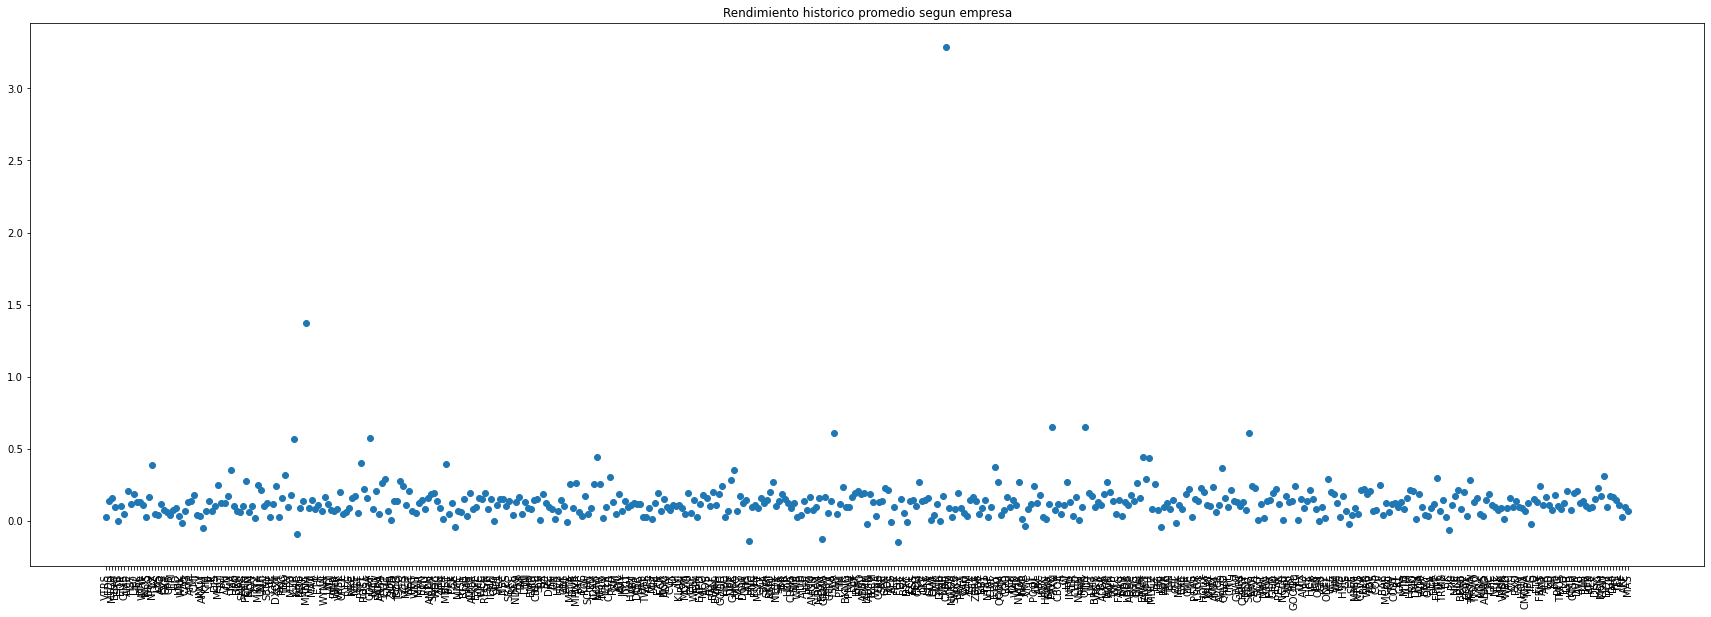

In [107]:
plt.figure(figsize=(30,10))
plt.plot(mean_returns,linestyle='None',marker='o')
plt.xticks(rotation=90)
plt.title('Rendimiento historico promedio segun empresa')
plt.show()

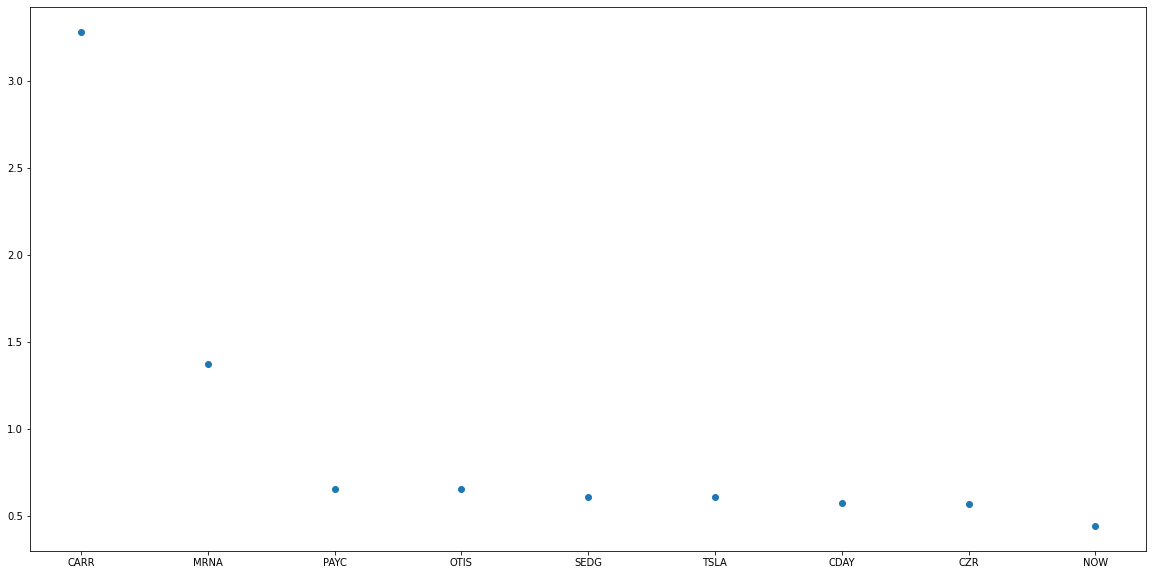

In [108]:
plt.figure(figsize=(20,10))
plt.plot(empresas_recomendadas,linestyle='None',marker='o')
plt.show()

In [104]:
lista_recomendadas=empresas_recomendadas.index
lista_recomendadas=lista_recomendadas.tolist()
lista_recomendadas

['CARR', 'MRNA', 'PAYC', 'OTIS', 'SEDG', 'TSLA', 'CDAY', 'CZR', 'NOW']

In [109]:
df_empresas_recomendadas=df_empresas_recomendadas.merge(df_simbolos, on='Ticker', how='left')
df_empresas_recomendadas

,Ticker,Mean Historical Return,Security,GICS Sector,GICS Sub-Industry
0,CARR,3.284405,Carrier Global,Industrials,Building Products
1,MRNA,1.374071,Moderna,Health Care,Biotechnology
2,PAYC,0.652737,Paycom,Information Technology,Application Software
3,OTIS,0.651704,Otis Worldwide,Industrials,Industrial Machinery
4,SEDG,0.606537,SolarEdge,Information Technology,Semiconductor Equipment
5,TSLA,0.606513,"Tesla, Inc.",Consumer Discretionary,Automobile Manufacturers
6,CDAY,0.573045,Ceridian,Information Technology,Application Software
7,CZR,0.569485,Caesars Entertainment,Consumer Discretionary,Casinos & Gaming
8,NOW,0.440742,ServiceNow,Information Technology,Systems Software


In [111]:
lista_recomendadas=df_empresas_recomendadas['Security']
lista_recomendadas=lista_recomendadas.tolist()
lista_recomendadas

['Carrier Global',
 'Moderna',
 'Paycom',
 'Otis Worldwide',
 'SolarEdge',
 'Tesla, Inc.',
 'Ceridian',
 'Caesars Entertainment',
 'ServiceNow']

In [112]:
print("Las 9 mejores empresas para invertir segun el promedio de sus rendimientos historicos son: ")
for i in lista_recomendadas:
    print(f'- {i}')

Las 9 mejores empresas para invertir segun el promedio de sus rendimientos historicos son: 
- Carrier Global
- Moderna
- Paycom
- Otis Worldwide
- SolarEdge
- Tesla, Inc.
- Ceridian
- Caesars Entertainment
- ServiceNow


Las 9 mejpores empresas para invertir son:
  -  Carrier Global
  - Moderna,
  - Paycom
  - Otis Worldwide,
  - SolarEdge,
  - Tesla, Inc.,
  - Ceridian,
  - Caesars Entertainment,
  - ServiceNow